<H1> Crowdfunding </H1>

The subject of the dataset is crowdfunding. This is a form of financing in which different investors give different amounts of money for certain projects. So it is earmarked funding. The basis is the history of a crowdfunding platform. All projects are completed projects, i.e. the crowdfunding period has expired. There are NO duplicates in the record.

The split data record contains the following columns (including meaning):

- funded_amount ... amount in USD received after the crowdfunding period has expired
- loan_amount ... target amount (amount that you wanted to achieve with funding) in USD
- activity ... Sub-category to which the goal of crowdfunding belongs thematically
- sector ... main category in which the crowdfunding topic falls
- use ... Brief description of what the money should be used for
- country_code ... Country code according to ISO standard
- country ... country name according to ISO standard
- region ... region
- currency ... Currency in which the funded_amount was then paid out
- term in months ... Duration over which the loan was paid out
- lender_count ... Lender (i.e. how many people gave money for the project)
- borrower_genders ... gender and number of borrowers, i.e. those who initiated the crowdfunding project
- repayment interval ... repayment modalities / frequency

<H2> Import the required modules </H2>

In [ ]:
# import the required libraries
import pandas as pd
import numpy as np
import plotly_express as px

# The following libraries are required only for converting plotly express plots to html
# otherwise when one tries to download Jupyter notebook as html file, plotly express plots don't appear
import plotly.offline as py
py.init_notebook_mode(connected=False)

# setting to avoid unnecessary chain assignment warnings
pd.options.mode.chained_assignment = None

<H2> Data Preprocessing </H2>

<H3> Read the data record </H3>


In [ ]:
# find out the separator of the first csv file

# The follwing ParseError appears when "/n" as separator is used.
# ParserError: Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
# df1 = pd.read_csv(filepath_or_buffer="part1.csv", sep="/n", engine="python")

df1 = pd.read_csv(filepath_or_buffer="part1.csv", sep="//n", engine="python")
df1.head()

In [ ]:
# "," is the separator
# now read again the csv file with the new separator into the DataFrame
# To avoid the column, Unnamed 0, use index_col
df_part1 = pd.read_csv(
    filepath_or_buffer="part1.csv",
    sep=',',
    engine='python',  # engine = 'python' otherwise it receives a warning
    index_col=0)
df_part1.head()

In [ ]:
# find out the separator of the second csv file

# The follwing ParseError appears when "/n" as separator is used.
# ParserError: Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
# df1 = pd.read_csv(filepath_or_buffer="part2.csv", sep="/n", engine="python")

df2 = pd.read_csv(filepath_or_buffer="part2.csv", sep="//n", engine="python")
df2.head()

In [ ]:
# "#" is the separator
# now read again the csv file with the new separator into the DataFrame
# To avoid the column, Unnamed 0, use index_col
df_part2 = pd.read_csv(filepath_or_buffer="part2.csv",
                       sep='#',
                       engine='python',
                       index_col=0)  # engine='python' da sonst Warning erhält
df_part2.head()

<H3> Properties </H3>

In [ ]:
# check the columns present in the first dataframe
df_part1.columns

In [ ]:
# check how many rows and coulumns are present in the first dataframe
df_part1.shape

In [ ]:
# check the columns present in the second dataframe
df_part2.columns

In [ ]:
# check how many rows and coulumns are present in the second dataframe
df_part2.shape

<B> Conclusion </B>

- Both of the dataframes obtained after parsing the two csv files, contain the same columns. This means that we need to concatenate the data.

<H3> Combine the two dataframes</H3>

In [ ]:
# combine the rows of the two dataframes as both have the same columns
# the concatenation will create a new integer index when ignore_index is set to true
df_part3 = pd.concat([df_part1, df_part2], ignore_index=True)
df_part3.head()

In [ ]:
# check how many rows and coulumns are present in the dataframe obtained after concatinating the two dataframes
df_part3.shape

In [ ]:
# find if any duplicated data is present
duplicated_rows = df_part3[df_part3.duplicated()]
duplicated_rows.head()

In [ ]:
# drop the duplicate rows from the concatanated dataframe
df_part4 = df_part3.drop_duplicates(subset=df_part3.columns)
df_part4.head()

In [ ]:
# check how many rows and coulumns are present in the dataframe obtained after dropping the duplicate rows
df_part4.shape

<H3> Missing values </H3>

<H4> Find out the synonyms </H4>

In [ ]:
#get an overview of the data type of the contents of the columns
# and missing values present
# and memory usage
df_part4.info()

In [ ]:
# use describe to get the statistical summary
df_part4.describe(include='all')

In [ ]:
# Identification via data type - comparison of data type with column content
# Check for synonyms
df_part4.dtypes 

In [ ]:
# converting to int datatype also doesnt not raise any kind of error
list1=['funded_amount','loan_amount','term_in_months']

for i in list1:
    pd.to_numeric(df_part4[i], errors='raise')    

<B> Conclusion </B>

- The columns "funded_amount", "loan_amount" and "term_in_months" have float values and datatype is also float64. With the analysis of the describe function and the usage of to_numeric, we can say that these columns do not contain any synonyms. 
- The columns "activity", "sector", "use", "country_code", "country", "region", "currency", "borrower_genders", "repayment_interval" have string values and the datatype is object. We need to inspect these columns further.
- "lender_count" has data type int and contains integer values. So this column is also fine and does not contain any synonyms.

In [ ]:
# check whether the column "activity" contains a synonym
df_part4.activity.unique()

In [ ]:
# check whether the column "sector" contains a synonym
df_part4.sector.unique()

In [ ]:
# check whether the column "use" contains a synonym
df_part4.use.unique()

In [ ]:
# check whether the column "country_code" contains a synonym
df_part4.country_code.unique()

In [ ]:
# check whether the column "country" contains a synonym
df_part4.country.unique()

In [ ]:
# check whether the column "region" contains a synonym
df_part4.region.unique()

In [ ]:
# check whether the column "currency" contains a synonym
df_part4.currency.unique()

In [ ]:
# check whether the column "borrower_genders" contains a synonym
df_part4.borrower_genders.unique()

In [ ]:
# check whether the column "repayment_interval" contains a synonym
df_part4.repayment_interval.unique()

<B> Conclusion </B>

- After the analysis of the columns "activity", "sector", "use", "country_code", "country", "region", "currency", "borrower_genders" and "repayment_interval", we can conclude that these do not contain any synonyms.

<H4> Find out the NA values </H4>

In [ ]:
# check the total count of the NA values in each column
df_part4.isnull().sum()

<B> Conclusion </B>

- The columns "use", "region", "country_code" and "borrower_genders" have null values. We need to inspect these columns further.

<H4> Replace the NA values </H4>

In [ ]:
# check for which country country_code is NA value
df_part4.loc[df_part4.country_code.isnull()]

In [ ]:
# The country code of Namibia is NA, assign the same to the country_code column where the country is Namibia
df_part4.loc[df_part4.country_code.isnull() & (df_part4.country == 'Namibia'),
             ['country_code']] = 'NA'

In [ ]:
# check the dataframe for the remaining NA values
df_part4.isnull().sum()

<B> Conclusion </B>

- The columns "use", "region"and "borrower_genders" have null values. We need to inspect these columns further.
- The null values in column "use" are 0.06% of the total values. These can be replaced with empty strings.

In [ ]:
# The null values in column "use" are 0.06% of the total values. These can be replaced with empty strings.
df_part4.loc[df_part4.use.isnull(), ['use']] = ''

In [ ]:
# check the dataframe for the remaining NA values
df_part4.isnull().sum()

<B> Conclusion </B>

- The columns "region" and "borrower_genders" have null values. We need to inspect these columns further.
- The null values in column "region" are 8.6% of the total values. These can be replaced with the most occuring region for a specific country.

In [ ]:
# check for which countries, the region is null, sort by ascending order
for i in df_part4.loc[df_part4.region.isnull(), ['country']].value_counts().index:
        try:
            # replace NA value with the most occuring region for a specific country
            str1 = df_part4.loc[df_part4.country == i[0], 'region'].value_counts().idxmax()
            df_part4.loc[df_part4.region.isnull() & (df_part4.country == i[0]),
             ['region']] = str1
        except:
            # in case of any error, replace with an empty string
            df_part4.loc[df_part4.region.isnull() & (df_part4.country == i[0]),
             ['region']] = ""

In [ ]:
df_part4.isnull().sum()

<B> Conclusion </B>

- The columns "borrower_genders" has null values. We need to inspect this column further.
- The null values in column "borrower_genders" are 0.06% of the total values. These can be left as it is and a new column can be created depending on this column called "borrower_count".

In [ ]:
# Depending on the column "borrower_genders", create one more column "borrower_count" which contains the total no. of borrowers.
male_list = []
female_list = []
for i in df_part4.borrower_genders:
    try:
        str1 = i.split(", ")
        male_list.append(str1.count('male'))
        female_list.append(str1.count('female'))
    except: 
        # in case of exception, append NAN values
        male_list.append(np.nan)
        female_list.append(np.nan)    
df_female = pd.DataFrame(female_list)
df_male = pd.DataFrame(male_list) 
df_part4['borrower_count'] = df_female +  df_male 

# The missing values in column "borrower_count" can be replaced with 1 as there will be atleast 1 borrower for all these cases
df_part4.loc[df_part4.borrower_count.isnull(), ['borrower_count']] = 1

df_part4.head()

<H2> Memory usage optimization </H2>

In [ ]:
# find out the memory usage of each column in bytes
df_part4.memory_usage(deep=True)

In [ ]:
df_part4.info()

In [ ]:
# for further optimization, convert the types of column with string values to category
list1 = ['activity', 'sector', 'use', 'country_code', 'country', 'region', 'currency', 'borrower_genders','repayment_interval']

for i  in list1:
    df_part4[i] = df_part4[i].astype('category')

In [ ]:
list1=['funded_amount','loan_amount','term_in_months','borrower_count']

for i in list1:
    df_part4[i] = pd.to_numeric(df_part4[i], errors='coerce', downcast='integer')
    
df_part4.info()

<B> Conclusion </B>

- The memory usage has been reduced from 74 MB to 50.3 MB. A reduction of 32% has been achieved.

<H2> Visualisation </H2>

<H3> Sunburst plot </H3>

<H4> Create a new column for success rate </H4>

In [ ]:
# Create a new column success
df_part4["Success_Rate"] = df_part4["funded_amount"] / df_part4["loan_amount"]       

In [ ]:
df_part4.describe()

In [ ]:
# Where the success ratio is more than 1, consider it as a big success of the project
# where it is 1, consider that as the target achieved.
# where it is 0.9 to 1, consider it as nearing the target.
# where it is below 0.9, consider it as failed.
# calculate the success rate for each respective countries
list1 = []
for i in df_part4["Success_Rate"]:
    if(i > 1):
        list1.append("Big Success")
    elif(i == 1):
        list1.append("Target achieved")
    elif(0.90 < i < 1):
        list1.append("Near the target")
    else:
        list1.append("Failed")        
df_part4['success'] = list1

In [ ]:
# find out where the success_rate is highest
df_part4.loc[df_part4.success == "Big Success"]

In [ ]:
df_sunburst = df_part4.groupby(["success","sector","activity"]).agg({"funded_amount":np.mean, "Success_Rate":np.mean, "lender_count":np.mean})
df_sunburst.reset_index(inplace=True)

In [ ]:
# Create a sunburst chart to find out the distribution of the funded amount 
# and the success rate for various sectors and activities
fig1 = px.sunburst(df_sunburst,
                  path=['success','sector', 'activity'],
                  values='funded_amount',
                  color='success',
                  hover_data=["Success_Rate", "lender_count"],
                  color_discrete_sequence=["pink", "green", "yellow", "red"],
              title="Funded amount, lender count and the success ratio of the crowdfunding of the various sectors and activities")
fig1.update_layout(paper_bgcolor="#fcfae8", font_color="blue")
fig1.show()


<B> Conclusion </B>

- more than 100% - "Big Success"
- 100% - "Target achieved"
- 90% to 100% - "Near the target"
- "Failed" 
- 80% of the funded amount has been used for projects which have achieved the target or are near the target.
- Food, Services and Retail are the sectors which have recieved a large share of the funds and have good success ratio also. 
- Renewable Energy Products is an activity where lots of investors are interested in putting there money in and this activity has a good success ratio also. So if one is looking to start a new business, i would highly recommend renewable energy products. 
- The crowd funding projects have been very successful in the activites "Farm Supplies" and "General Store".


<H2> Bar plot </H2>

In [ ]:
# find out the average no. of lenders and borrowers depending on the repayment interval and term in months
df_borrower = df_part4.groupby(["repayment_interval","term_in_months"]).agg({"lender_count":np.mean, "borrower_count":np.mean})
df_borrower.reset_index(inplace=True)

In [ ]:
# Create the categories for no. of borrowers
kategorien = ['less','average','more']

max_value = df_borrower['borrower_count'].max()
min_value = df_borrower['borrower_count'].min()
einteilung = [0,5,10,max_value]

df_borrower['Borrowers'] = pd.cut(df_borrower['borrower_count'], bins=einteilung, labels=kategorien)

In [ ]:
# Create the categories for years
kategorien = ['< 1','between 1 and 3','between 3 and 5','between 5 and 10','more than 10']
max_value = df_borrower['term_in_months'].max()
einteilung = [0,12,36,60,120,max_value]

df_borrower['Years'] = pd.cut(df_borrower['term_in_months'], bins=einteilung, labels=kategorien)

In [ ]:
# Create a plot to find out the average no. of lenders and borrowers depending on the repayment interval 
# and term in months
fig = px.bar(df_borrower,
                 x="Borrowers",
                 y="lender_count",
                 facet_col="repayment_interval",
                 color="Years",
                 hover_data=['borrower_count','term_in_months'],
                 title="Average no. of lenders and borrowers depending on the repayment interval and term in months", log_y = True)

fig.update_layout(paper_bgcolor="#fcfae8")
fig.show()

<B> Conclusion </B>

- Here we have analysed how the interest of the lenders and borrowers is varyin depending on the "repayment interval" and the "term in months". 
- Very few lenders and borrowers are interested when the repayment interval is weekly and term is less than 1 year.
- Lender count is going high when the repayment interval is irregular and terms in months is increasing.
- When the "repayment interval" is bullet and monthly, the lenders are more interested when the "terms in months" is less.

<H3> Choropleth plot </H3>

<H4> Create a new column for iso country codes </H4>

In [ ]:
# Read  the csv file with the iso country codes into the DataFrame
df_part5 = pd.read_csv(filepath_or_buffer="iso-country-codes.csv",
                       sep=',',
                       engine='python')  # engine='python' da sonst Warning exxrhält
df_part5.head()

In [ ]:
# Create a new column "iso_alpha" with the iso country codes for each respective country

df_part5.drop(['Numeric code','ISO 3166-2'],axis=1,inplace=True)
df_part5.rename(mapper={'English short name lower case':'Name','Alpha-2 code': 'XX','Alpha-3 code':'XXX'}, axis=1, copy=True, inplace=True)

df_part4['iso_alpha']=df_part4.country_code.map(df_part5.set_index('XX')['XXX'])
df_part4[df_part4['iso_alpha'].isnull()].groupby('country').count()

df_part4['iso_alpha'][df_part4['country']=='Kosovo']='KOS'
df_part4['iso_alpha'][df_part4['country']=='South Sudan']='SSD'
df_part4['iso_alpha'][df_part4['country']=='Namibia']='NAM'

In [ ]:
# Create the dataframe 
df_success_rate = df_part4.groupby(["iso_alpha"]).agg({'Success_Rate':np.mean,'funded_amount': np.sum})
df_success_rate.sort_values(by="Success_Rate", ascending=False)

# Create a new column success
list1 = []
for i in df_success_rate.Success_Rate:
    if(i > 1):
        list1.append("Big Success")
    elif(i == 1):
        list1.append("Target achieved")
    elif(0.90 < i < 1):
        list1.append("Near the target")
    else:
        list1.append("Failed")       
df_success_rate['success'] = list1       
df_success_rate.reset_index(inplace=True)

In [ ]:
df_success_rate.sort_values(by="funded_amount", ascending=False)

In [ ]:
# plot the graph to see how much the crowd funding has been successful in each country
px.choropleth(df_success_rate,
              locations="iso_alpha",
              color="success",
              hover_name="iso_alpha",
              hover_data=['Success_Rate', 'funded_amount'],
              title="Success ratio and funded amount per country",
              color_discrete_sequence=["green", "yellow", "red"],
              labels={"success_rate": "Success Rate"})

<B> Conclusion </B>
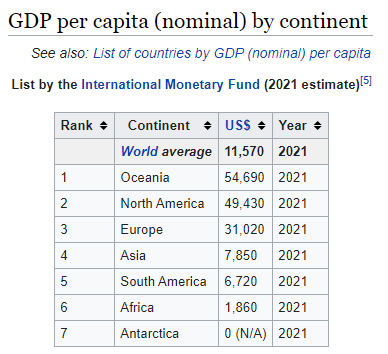
- The crowd funding projects have been very successful in most of the countries in "Asia" and "Africa".
- In "North America", we can see more red zones.
- So we can see, in africa, asia and south america, we have "reached the targets" or are "near the targets" in comparison to North America. 
- we see more crowdfunding projects in asia, africa and south america than europe, ocenia  and usa. 
- This may be due to many Philanthropic organisations supporting crowdfunding and investing in Africa, asia and south america.
- As we can see for the chart below, the GDP per capita is lowest in Asia, South America and Africa.
- Crowdfunding projects are more required here as people can't make more regular payments due to less regular income as more people are involved in unorganised sectors, so loans from banks doesn't work much here.
- Philipinnes and Kenya has got the maximum funded amount.